In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os

In [2]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

In [3]:
df_pre =pd.read_csv('data/wine.csv')
df = df_pre.sample(frac=1)

In [4]:
print(df.head())

      7.4   0.7     0   1.9  0.076    11     34   0.9978  3.51  0.56   9.4  5  \
5315  6.3  0.18  0.24   3.4  0.053  20.0  119.0  0.99373  3.11  0.52   9.2  6   
2423  7.0  0.21  0.37   7.2  0.042  36.0  167.0  0.99580  3.26  0.56   9.8  6   
3517  7.3  0.22  0.50  13.7  0.049  56.0  189.0  0.99940  3.24  0.66   9.0  6   
1622  6.6  0.27  0.41   1.3  0.052  16.0  142.0  0.99510  3.42  0.47  10.0  6   
4060  8.3  0.25  0.33   2.5  0.053  12.0   72.0  0.99404  2.89  0.48   9.5  5   

      1  
5315  0  
2423  0  
3517  0  
1622  0  
4060  0  


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6496 entries, 5315 to 2732
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   7.4     6496 non-null   float64
 1   0.7     6496 non-null   float64
 2   0       6496 non-null   float64
 3   1.9     6496 non-null   float64
 4   0.076   6496 non-null   float64
 5   11      6496 non-null   float64
 6   34      6496 non-null   float64
 7   0.9978  6496 non-null   float64
 8   3.51    6496 non-null   float64
 9   0.56    6496 non-null   float64
 10  9.4     6496 non-null   float64
 11  5       6496 non-null   int64  
 12  1       6496 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.5 KB
None


In [6]:
dataset= df.values
print(dataset.dtype)

float64


In [7]:
X = dataset[:, :12]
Y = dataset[:, 12]

In [8]:
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                390       
_________________________________________________________________
dense_1 (Dense)              (None, 12)                372       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 13        
Total params: 775
Trainable params: 775
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [12]:
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath,
                              monitor='val_loss',
                              verbose=1, save_best_only=True)

Epoch 1/3500
9/9 [==============================] - 1s 17ms/step - loss: 4.8194 - accuracy: 0.7479 - val_loss: 3.4007 - val_accuracy: 0.7663
Epoch 2/3500
9/9 [==============================] - 0s 5ms/step - loss: 2.8254 - accuracy: 0.7477 - val_loss: 1.6633 - val_accuracy: 0.7673
Epoch 3/3500
9/9 [==============================] - 0s 4ms/step - loss: 1.1958 - accuracy: 0.7819 - val_loss: 0.4879 - val_accuracy: 0.8694
Epoch 4/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.3895 - accuracy: 0.8525 - val_loss: 0.4584 - val_accuracy: 0.7607
Epoch 5/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.3467 - accuracy: 0.8594 - val_loss: 0.2891 - val_accuracy: 0.9072
Epoch 6/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.3019 - accuracy: 0.9023 - val_loss: 0.2892 - val_accuracy: 0.9090
Epoch 7/3500
9/9 [==============================] - 0s 4ms/step - loss: 0.2795 - accuracy: 0.9056 - val_loss: 0.2758 - val_accuracy: 0.9021
Epoch 8/3500
9/9 [=

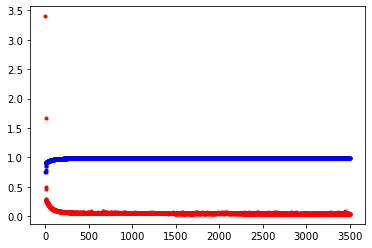

In [13]:
history = model.fit(X, Y, validation_split=0.33, epochs=3500, batch_size=500)
y_vloss = history.history['val_loss']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vloss,'o',c='red',markersize=3)
plt.plot(x_len, y_acc,'o',c='blue',markersize=3)
plt.show()
#print('Accuracy: %.4f' % (model.evaluate(X,Y)[1]))